# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# resnet56 classifier

In [6]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.resnet import resnet56

resnet = resnet56()
print(resnet)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

# train reset56


In [7]:
%%time
opt = optim.SGD(resnet.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(resnet, opt, loss_fn)
def reduce_lr(epoch):
    if epoch <= 91:
        return 1
    elif epoch > 91 and epoch <= 137:
        return 0.1
    else:
        return 0.01
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = None
history = solver.train(epochs=182, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/182, lr:1.00e-01
[##################################################] 100.00% loss:1.8 acc:31.66% val_loss:1.6 val_acc:40.86%
Epoch: 2/182, lr:1.00e-01
[##################################################] 100.00% loss:1.3 acc:51.00% val_loss:1.2 val_acc:55.52%
Epoch: 3/182, lr:1.00e-01
[##################################################] 100.00% loss:1.0 acc:62.83% val_loss:1.3 val_acc:58.16%
Epoch: 4/182, lr:1.00e-01
[##################################################] 100.00% loss:0.86 acc:69.58% val_loss:0.93 val_acc:68.72%
Epoch: 5/182, lr:1.00e-01
[##################################################] 100.00% loss:0.74 acc:73.93% val_loss:0.81 val_acc:72.78%
Epoch: 6/182, lr:1.00e-01
[##################################################] 100.00% loss:0.68 acc:76.65% val_loss:0.73 val_acc:76.34%
Epoch: 7/182,

[##################################################] 100.00% loss:0.19 acc:93.37% val_loss:0.47 val_acc:86.40%
Epoch: 60/182, lr:1.00e-01
[##################################################] 100.00% loss:0.19 acc:93.39% val_loss:0.48 val_acc:86.28%
Epoch: 61/182, lr:1.00e-01
[##################################################] 100.00% loss:0.19 acc:93.36% val_loss:0.46 val_acc:86.68%
Epoch: 62/182, lr:1.00e-01
[##################################################] 100.00% loss:0.19 acc:93.50% val_loss:0.58 val_acc:84.36%
Epoch: 63/182, lr:1.00e-01
[##################################################] 100.00% loss:0.19 acc:93.28% val_loss:0.47 val_acc:86.98%
Epoch: 64/182, lr:1.00e-01
[##################################################] 100.00% loss:0.18 acc:93.72% val_loss:0.4 val_acc:88.14%
Epoch: 65/182, lr:1.00e-01
[##################################################] 100.00% loss:0.18 acc:93.58% val_loss:0.45 val_acc:87.10%
Epoch: 66/182, lr:1.00e-01
[##################################

[##################################################] 100.00% loss:0.01 acc:99.75%% val_loss:0.33 val_acc:93.48%
Epoch: 119/182, lr:1.00e-02
[##################################################] 100.00% loss:0.0097 acc:99.74% val_loss:0.33 val_acc:93.42%
Epoch: 120/182, lr:1.00e-02
[##################################################] 100.00% loss:0.01 acc:99.75% val_loss:0.32 val_acc:93.74%
Epoch: 121/182, lr:1.00e-02
[##################################################] 100.00% loss:0.009 acc:99.79% val_loss:0.34 val_acc:93.68%
Epoch: 122/182, lr:1.00e-02
[##################################################] 100.00% loss:0.0084 acc:99.79% val_loss:0.33 val_acc:93.54%
Epoch: 123/182, lr:1.00e-02
[##################################################] 100.00% loss:0.0083 acc:99.79% val_loss:0.34 val_acc:93.52%
Epoch: 124/182, lr:1.00e-02
[##################################################] 100.00% loss:0.0077 acc:99.80% val_loss:0.35 val_acc:93.60%
Epoch: 125/182, lr:1.00e-02
[################

[##################################################] 100.00% loss:0.0036 acc:99.93% val_loss:0.35 val_acc:93.88%
Epoch: 177/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0039 acc:99.93% val_loss:0.35 val_acc:93.72%
Epoch: 178/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0037 acc:99.94% val_loss:0.35 val_acc:93.76%
Epoch: 179/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0033 acc:99.96% val_loss:0.35 val_acc:93.82%
Epoch: 180/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0035 acc:99.94% val_loss:0.35 val_acc:93.68%
Epoch: 181/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0034 acc:99.95% val_loss:0.35 val_acc:93.78%
Epoch: 182/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0034 acc:99.94% val_loss:0.36 val_acc:93.72%
end training
CPU times: user 1h 8min 16s,

# plot loss history
We check the classifier by plotting the loss and acc.

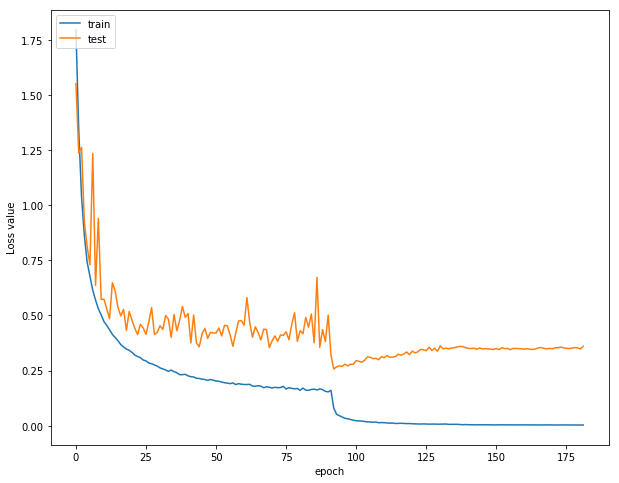

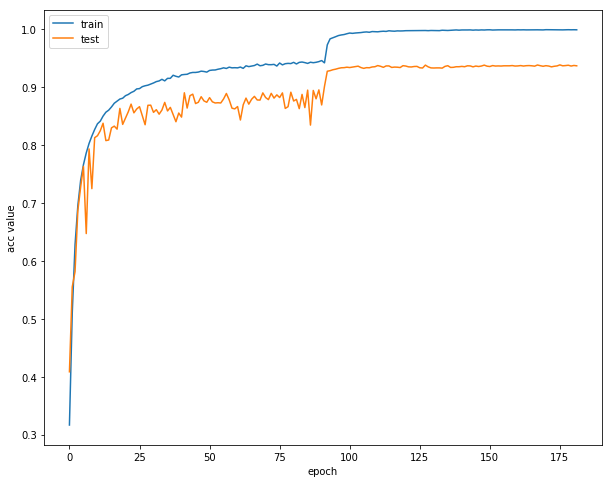

In [8]:
plot_history(history)

# test classifier
test on test data

In [9]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.36 test_acc:93.72%
